<a href="https://colab.research.google.com/github/WoodenPillow/DeepGuard-Deep-Learning-Ransomware-Detection-System/blob/main/Dataset_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Libraries**

In [53]:
# Import required libraries for data exploration and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter/Colab.
%matplotlib inline

# Set a style for the plots.
sns.set(style="whitegrid")

# Mount Google Drive (if running in Colab)
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 2: Load the CSV Files**

In [54]:
# Define the paths to the processed CSV files.
TRAIN_CSV_PATH = '/content/drive/MyDrive/Ransomware-Detection/Dataset/ProcessedMetadata/train_metadata.csv'
TEST_CSV_PATH  = '/content/drive/MyDrive/Ransomware-Detection/Dataset/ProcessedMetadata/test_metadata.csv'

# Load the CSV files into Pandas DataFrames.
train_df = pd.read_csv(TRAIN_CSV_PATH)
test_df = pd.read_csv(TEST_CSV_PATH)

# Print basic information for confirmation.
print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)

print("\nTrain DataFrame - First 5 Rows:")
print(train_df.head())

print("\nTest DataFrame - First 5 Rows:")
print(test_df.head())


Train DataFrame shape: (800000, 9)
Test DataFrame shape: (200000, 9)

Train DataFrame - First 5 Rows:
                                              sha256  \
0  0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...   
1  c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...   
2  eac8ddb4970f8af985742973d6f0e06902d42a3684d791...   
3  7f513818bcc276c531af2e641c597744da807e21cc1160...   
4  ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...   

                                md5 appeared  label avclass  general_size  \
0  63956d6417f8f43357d9a8e79e52257e  2006-12      0     NaN       3101705   
1  6f7bde7a1126debf0cc359a54953efc1  2007-01      0     NaN        504320   
2  7520c8f9534ca818726a4feaebf49e2b  2007-02      0     NaN        180224   
3  e435a536968941854bcec3b902c439f6  2007-02      0     NaN       2377730   
4  e93049e2df82ab26f35ad0049173cb14  2007-02      0     NaN       1153808   

   general_exports  general_imports  strings_numstrings  
0                0              156     

**Step 3: Data Cleaning and Feature Engineering**

In [55]:
# Check the available columns.
print("Columns in train_df:", train_df.columns.tolist())

# We want to keep all columns, so columns_to_drop remains empty.
columns_to_drop = []
df_clean = train_df.drop(columns=columns_to_drop, errors='ignore')

# Convert the 'appeared' column to datetime,
# extract the year and month, and create a new 'month_year' column.
if 'appeared' in df_clean.columns:
    df_clean['appeared_dt'] = pd.to_datetime(df_clean['appeared'], format='%Y-%m', errors='coerce')
    df_clean['year'] = df_clean['appeared_dt'].dt.year
    df_clean['month'] = df_clean['appeared_dt'].dt.month
    df_clean['month_year'] = df_clean['year'].astype(str) + '-' + df_clean['month'].astype(str)
    df_clean = df_clean.drop(columns=['appeared', 'appeared_dt'])

# Fill missing numerical values with zero.
df_clean = df_clean.fillna(0)

# Count missing cells and total rows before further filtering.
missing_cells_before = df_clean.isnull().sum().sum()
rows_before = df_clean.shape[0]
print("\nBefore dropping rows:")
print("Total missing cells:", missing_cells_before)
print("Total rows:", rows_before)

# Drop rows with missing values.
df_clean = df_clean.dropna()
rows_after = df_clean.shape[0]
rows_removed = rows_before - rows_after
print("\nAfter dropping rows with missing values:")
print("Rows removed:", rows_removed)
print("Remaining rows:", rows_after)
missing_cells_after = df_clean.isnull().sum().sum()
print("Total missing cells after cleaning:", missing_cells_after)

Columns in train_df: ['sha256', 'md5', 'appeared', 'label', 'avclass', 'general_size', 'general_exports', 'general_imports', 'strings_numstrings']

Before dropping rows:
Total missing cells: 0
Total rows: 800000

After dropping rows with missing values:
Rows removed: 0
Remaining rows: 800000
Total missing cells after cleaning: 0


**Step 3.1: Remove Rows with a Label of -1**

In [56]:
if 'label' in df_clean.columns:
    rows_before_filter = df_clean.shape[0]
    df_clean = df_clean[df_clean['label'] != -1]
    rows_after_filter = df_clean.shape[0]
    print("\nAfter removing rows with label = -1:")
    print("Rows removed:", rows_before_filter - rows_after_filter)
    print("Remaining rows:", rows_after_filter)

print("\nCleaned DataFrame Info:")
print(df_clean.info())


After removing rows with label = -1:
Rows removed: 200000
Remaining rows: 600000

Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 0 to 799999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   sha256              600000 non-null  object
 1   md5                 600000 non-null  object
 2   label               600000 non-null  int64 
 3   avclass             600000 non-null  object
 4   general_size        600000 non-null  int64 
 5   general_exports     600000 non-null  int64 
 6   general_imports     600000 non-null  int64 
 7   strings_numstrings  600000 non-null  int64 
 8   year                600000 non-null  int32 
 9   month               600000 non-null  int32 
 10  month_year          600000 non-null  object
dtypes: int32(2), int64(5), object(4)
memory usage: 50.4+ MB
None


**Step 3.2: Save the Cleaned Data to a New CSV File**

In [57]:
CLEANED_CSV_PATH = '/content/drive/MyDrive/Ransomware-Detection/Dataset/ProcessedMetadata/cleaned_train_metadata.csv'
df_clean.to_csv(CLEANED_CSV_PATH, index=False)
print("Cleaned data saved to:", CLEANED_CSV_PATH)

Cleaned data saved to: /content/drive/MyDrive/Ransomware-Detection/Dataset/ProcessedMetadata/cleaned_train_metadata.csv


**Step 4: Visualization and Exploratory Plots**

4.1 Distribution of the Target Variable

<ipython-input-58-bf03b8f3bf94>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_clean, palette='viridis')


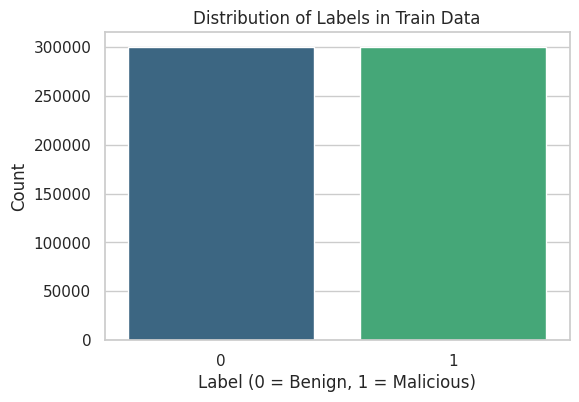

In [58]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df_clean, palette='viridis')
plt.title("Distribution of Labels in Train Data")
plt.xlabel("Label (0 = Benign, 1 = Malicious)")
plt.ylabel("Count")
plt.show()


4.2 Histograms of Numeric Features

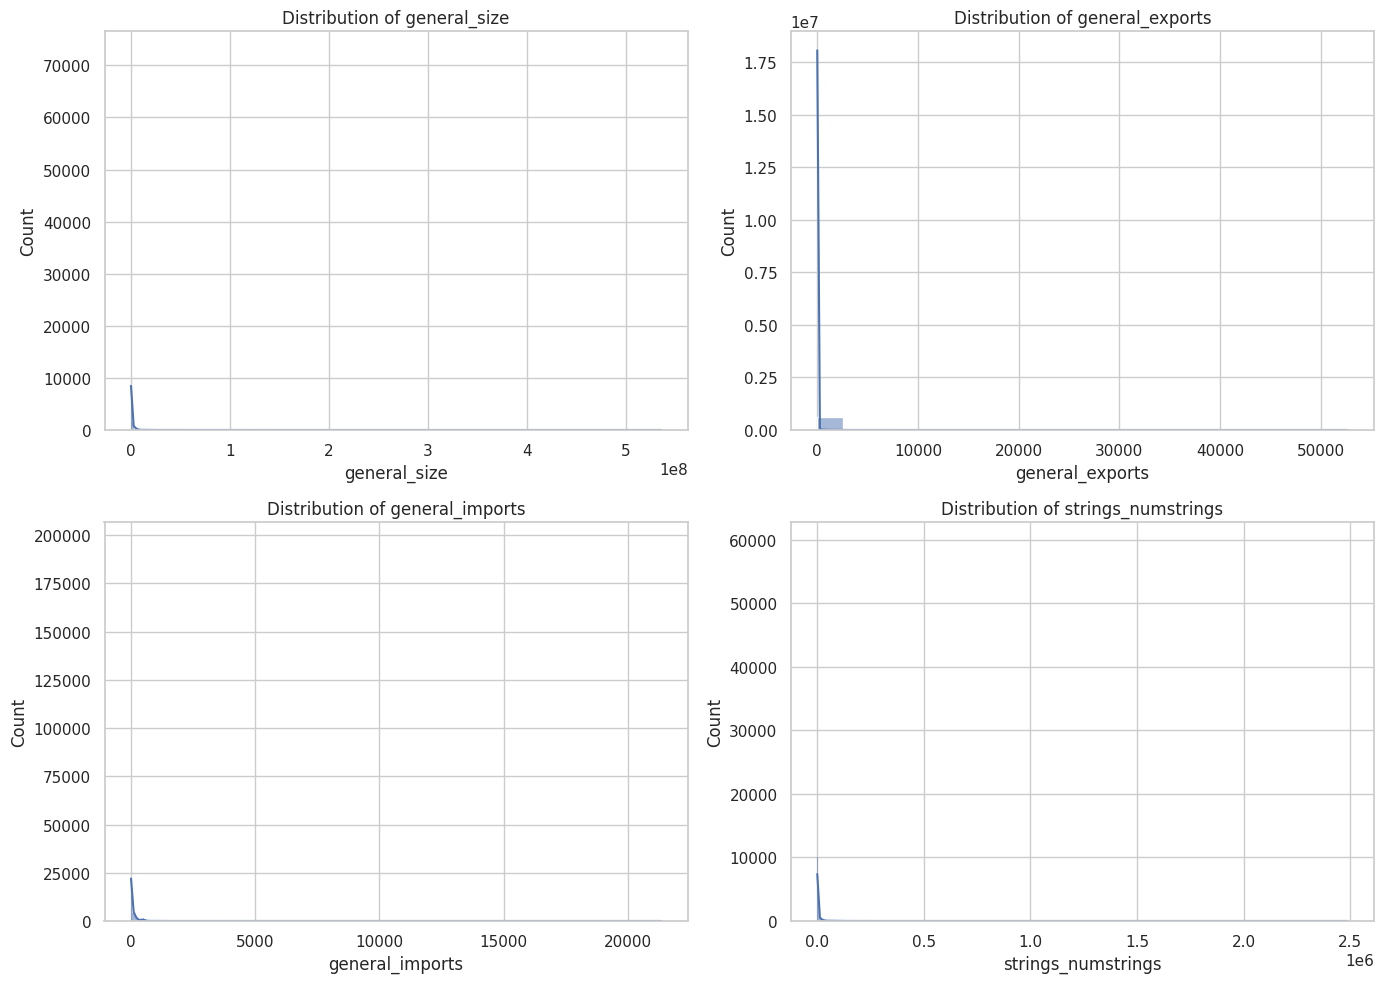

In [59]:
# Define the numeric features we want to inspect.
numeric_features = ['general_size', 'general_exports', 'general_imports', 'strings_numstrings']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feat in enumerate(numeric_features):
    if feat in df_clean.columns:
        sns.histplot(df_clean[feat], kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {feat}")
    else:
        axes[i].set_visible(False)
plt.tight_layout()
plt.show()


4.3 Boxplots of Features by Label

<ipython-input-60-de1e61618c8c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feat, data=df_clean, ax=axes[i], palette="Set2")
<ipython-input-60-de1e61618c8c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feat, data=df_clean, ax=axes[i], palette="Set2")
<ipython-input-60-de1e61618c8c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feat, data=df_clean, ax=axes[i], palette="Set2")
<ipython-input-60-de1e61618c8c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

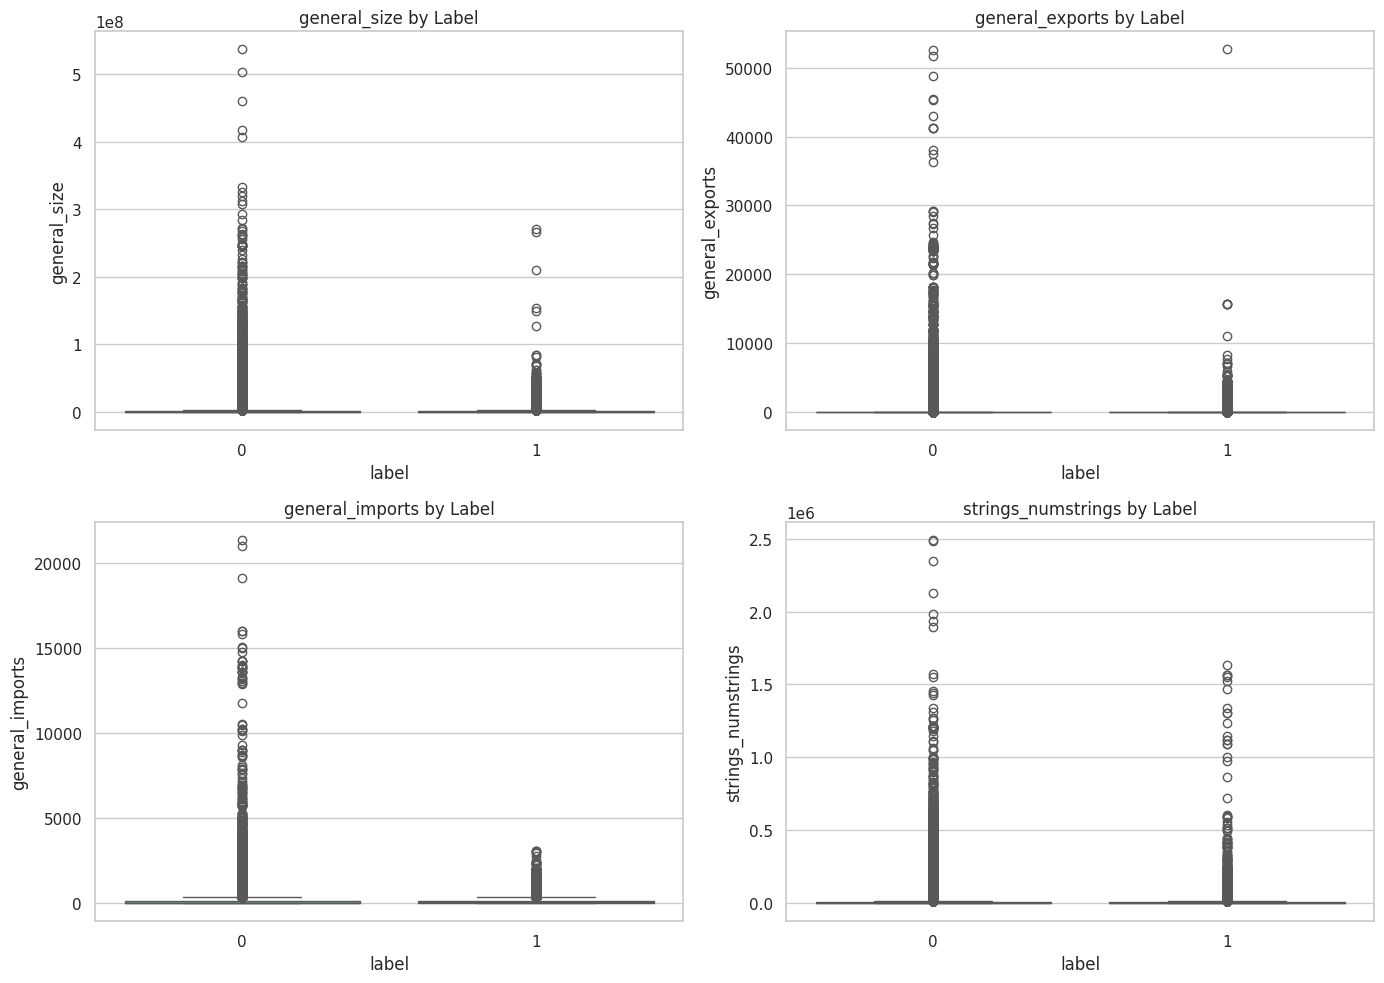

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feat in enumerate(numeric_features):
    if feat in df_clean.columns:
        sns.boxplot(x='label', y=feat, data=df_clean, ax=axes[i], palette="Set2")
        axes[i].set_title(f"{feat} by Label")
    else:
        axes[i].set_visible(False)
plt.tight_layout()
plt.show()


4.4 Correlation Heatmap

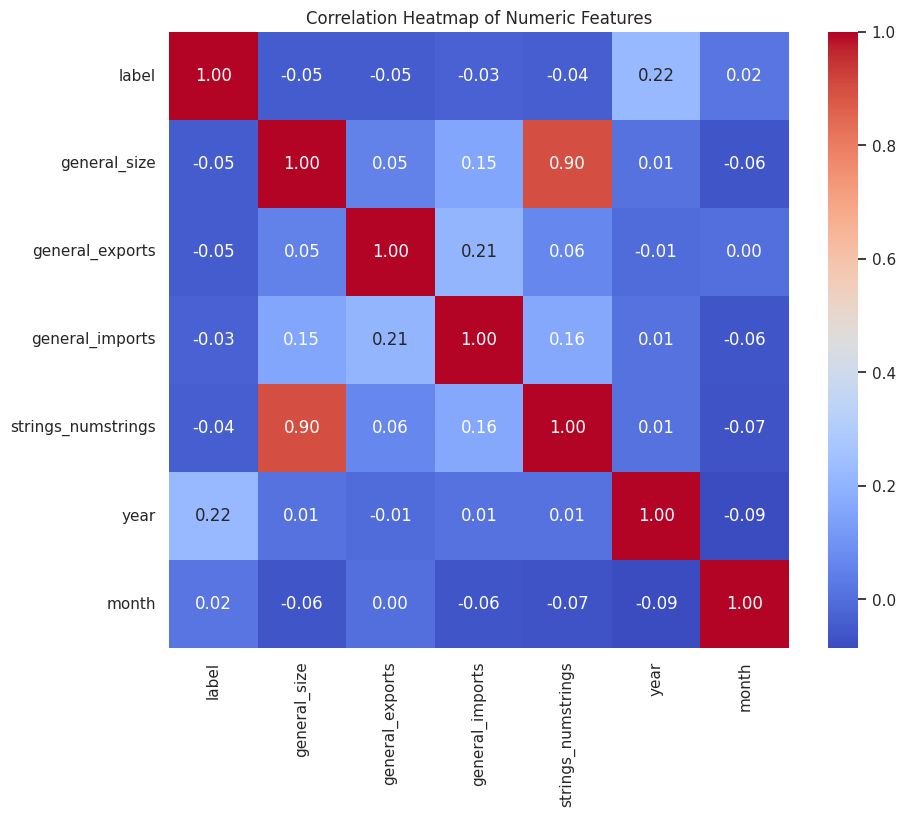

In [61]:
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


4.5 Samples Per Month-Year

<ipython-input-62-c221fcab883f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')


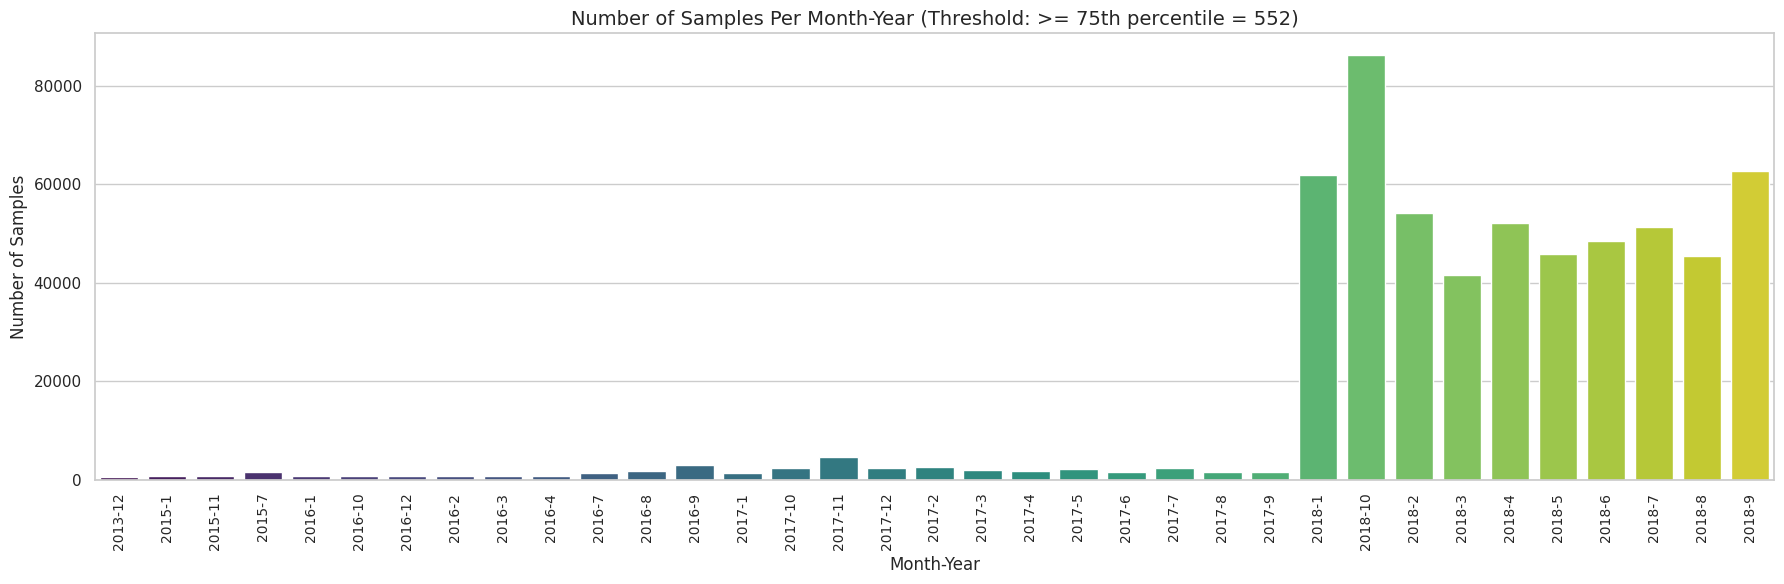


Samples per Month-Year (only where count >= 75th percentile):
month_year
2013-12      567
2015-1       632
2015-11      658
2015-7      1424
2016-1       723
2016-10      781
2016-12      706
2016-2       622
2016-3       760
2016-4       612
2016-7      1406
2016-8      1697
2016-9      2951
2017-1      1267
2017-10     2340
2017-11     4477
2017-12     2415
2017-2      2469
2017-3      1890
2017-4      1641
2017-5      2128
2017-6      1569
2017-7      2405
2017-8      1547
2017-9      1504
2018-1     61914
2018-10    86414
2018-2     54137
2018-3     41525
2018-4     52082
2018-5     45912
2018-6     48401
2018-7     51421
2018-8     45425
2018-9     62769
Name: count, dtype: int64


In [62]:
plt.figure(figsize=(18, 6))
month_year_counts = df_clean['month_year'].value_counts().sort_index()

# Compute the 75th percentile threshold
threshold_75 = month_year_counts.quantile(0.75)

# Filter: keep only month-year entries with counts >= 75th percentile
filtered_counts = month_year_counts[month_year_counts >= threshold_75]

ax = sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')
plt.xticks(rotation=90, fontsize=10)  # Smaller font size for x-axis labels
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.title("Number of Samples Per Month-Year (Threshold: >= 75th percentile = {:.0f})".format(threshold_75), fontsize=14)
plt.tight_layout()
plt.show()

print("\nSamples per Month-Year (only where count >= 75th percentile):")
print(filtered_counts)
